### An Attractive Representation of Count Data

I like to play with ways to visualise data, in particular with how to represent data in the most meaningful, yet attractive and easily interpretable way. One case where I have found this to be particularly challenging is representing discrete count data, e.g., survey responses. These data are essentially 3D, with question number, response category, and response count.

Since the responses are techinquely categorical the mean is a questionable statistic, so simply averaging the data to reduce the dimensionality is not necessarily desirable. Furthermore, this loses information.

One solution is the heat map. This allows the question number and response category as the x-y axes, and the reponse count can then be colour coded. Here I present a short script to plot up some very simple data in a relatively attractive and informative style.

Note that box plots for each response are also a possible solution, and one that is probably most natural to users of R.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

before = np.loadtxt('Data/questionnaire_before.txt',delimiter=',')
after = np.loadtxt('Data/questionnaire_after.txt',delimiter=',')
form = np.loadtxt('Data/questionnaire_form.txt',delimiter=',')

questions = np.array(range(1,15))
form_quest = np.array([1,5,10,9,13,6,3,8,4,7,2,12,11,14])


before_m = before.mean(axis=0)
after_m = after.mean(axis=0)
form_m = form.mean(axis=0)

In [2]:
before

array([[ 3.,  1.,  3.,  2.,  1.,  2.,  3.,  2.,  1.,  1.,  1.,  2.,  1.,
         2.],
       [ 3.,  4.,  4.,  4.,  3.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  2.,
         2.],
       [ 2.,  3.,  4.,  4.,  3.,  1.,  5.,  3.,  3.,  3.,  4.,  5.,  5.,
         3.],
       [ 2.,  2.,  3.,  3.,  2.,  3.,  4.,  2.,  4.,  1.,  4.,  2.,  3.,
         3.],
       [ 2.,  3.,  2.,  3.,  2.,  4.,  3.,  2.,  3.,  2.,  1.,  3.,  3.,
         1.],
       [ 3.,  3.,  3.,  3.,  3.,  4.,  2.,  2.,  3.,  3.,  2.,  4.,  4.,
         2.],
       [ 3.,  5.,  5.,  1.,  5.,  1.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,
         5.],
       [ 4.,  3.,  4.,  1.,  4.,  2.,  4.,  1.,  4.,  5.,  4.,  4.,  4.,
         4.],
       [ 3.,  3.,  4.,  3.,  3.,  2.,  4.,  3.,  3.,  3.,  3.,  4.,  4.,
         3.],
       [ 3.,  2.,  3.,  3.,  1.,  3.,  3.,  2.,  2.,  1.,  1.,  3.,  2.,
         1.],
       [ 3.,  2.,  4.,  3.,  4.,  2.,  5.,  3.,  2.,  3.,  2.,  4.,  5.,
         2.],
       [ 3.,  2.,  2.,  3.,  3.,  2.,  5., 

As you can see above, the data as provided were arranged with rows for each question, and the responses of each individual as the columns.

We now present the data in the "wrong" way:

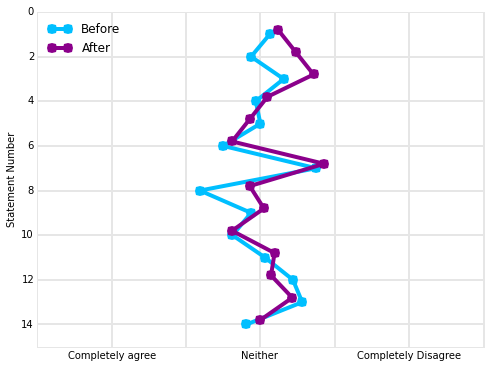

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.grid(color='#E6E6E6',linewidth=2,linestyle='-',)

ax.plot(before_m,questions,'o-',color='DeepSkyBlue',label='Before',lw=4,ms=10,mew=0)
ax.plot(after_m,questions-0.2,'o-',color='DarkMagenta',label='After',lw=4,ms=10,mew=0)

[line.set_zorder(3) for line in ax.lines]

ax.tick_params(axis='both',color='#E6E6E6')
ax.spines['top'].set_color('#E6E6E6')
ax.spines['bottom'].set_color('#E6E6E6')
ax.spines['left'].set_color('#E6E6E6')
ax.spines['right'].set_color('#E6E6E6')
ax.set_xlim(0,6)
ax.set_ylim(15,0)
ax.set_ylabel('Statement Number')
ax.legend(loc=2,frameon=False)
ax.set_xticklabels(['','Completely agree','','Neither','','Completely Disagree',''])


There are several issues with the above plot. Firstly, as discussed above, we have used the mean of the responses to each statement. While this <i>does</i> give a rough feeling of the overal tone, it loses information. We could add error bars to the points to indicate the spread in the responses.

The second significant issue with this plot is the use of connecting lines. These imply a relationship between the responses.
 
Now we move onto plotting the heatmaps. Since these need counts per response we need to reformat the data a bit first:

In [8]:
before_responses = np.zeros((5,14))
after_responses = np.zeros((5,14))
form_responses = np.zeros((5,14))

for ii in range(14):
    for jj in range(5):
        before_responses[jj,ii] = sum(before[:,ii] == jj+1)
        after_responses[jj,ii] = sum(after[:,ii] == jj+1)
        form_responses[jj,ii] = sum(form[:,ii] == jj+1)

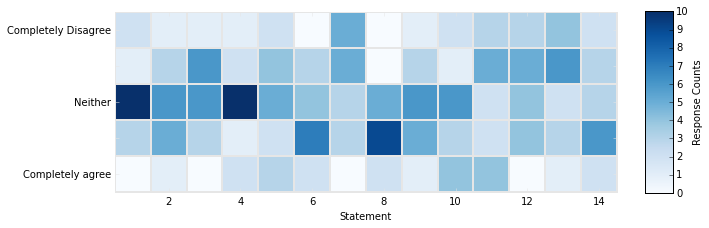

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

#Add nice light grey boundaries and grid:
ax.tick_params(axis='both', color='#E6E6E6')
ax.spines['top'].set_color('#E6E6E6')
ax.spines['bottom'].set_color('#E6E6E6')
ax.spines['left'].set_color('#E6E6E6')
ax.spines['right'].set_color('#E6E6E6')
ax.vlines(np.arange(0.5,15,1), 0.5,5.5, lw=2, colors='#E6E6E6')
ax.hlines(np.arange(0.5,6,1), 0.5,14.5, lw=2, colors='#E6E6E6')

#Plot the heatmap data
p = ax.imshow(before_responses, origin='lower', cmap='Blues', 
              extent=[0.5, 14.5, 0.5, 5.5], interpolation='nearest')
cb = plt.colorbar(p, aspect=6.5, fraction=0.05)
cb.set_label('Response Counts')

ax.set_yticklabels(['', 'Completely agree', '', 'Neither', '',
                    'Completely Disagree'])
ax.set_xlabel('Statement')

Which, I hope you agree, is a very attractive and informative plot.

As an aside, we can also use some additional matplotlib modules to put all fo the heat maps into a single figure, each with their own colour scheme and colour bar:

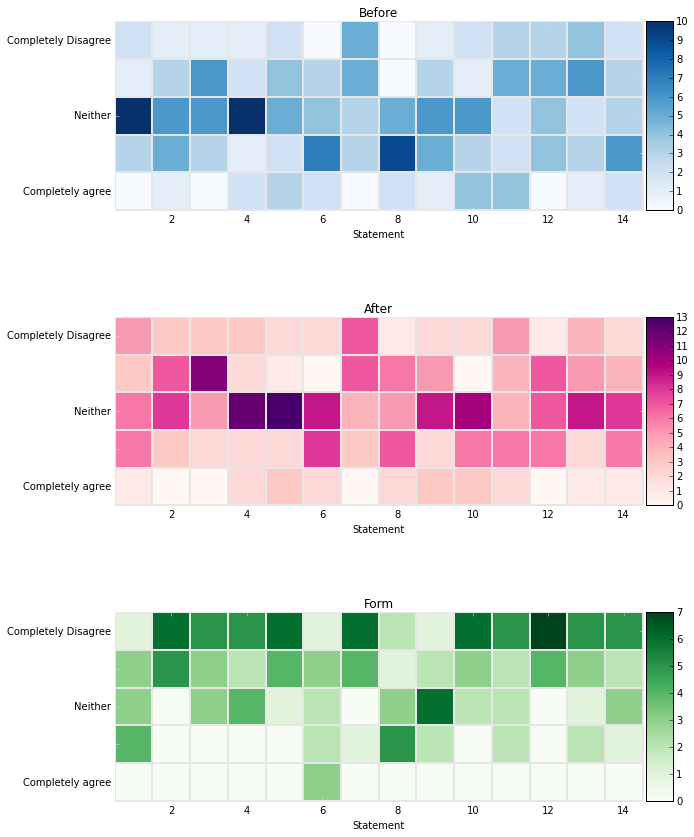

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

fig, axs = plt.subplots(3, 1, figsize=(10,15))

#Add nice light grey boundaries and grid:
for ax in axs.reshape(-1):
    ax.tick_params(axis='both', color='#E6E6E6')
    ax.spines['top'].set_color('#E6E6E6')
    ax.spines['bottom'].set_color('#E6E6E6')
    ax.spines['left'].set_color('#E6E6E6')
    ax.spines['right'].set_color('#E6E6E6')
    ax.vlines(np.arange(0.5, 15, 1), 0.5, 5.5, lw=2, colors='#E6E6E6')
    ax.hlines(np.arange(0.5, 6, 1), 0.5, 14.5, lw=2, colors='#E6E6E6')

#Plot the heatmap data
p = axs[0].imshow(before_responses, origin='lower', cmap='Blues',
                  extent=[0.5, 14.5, 0.5, 5.5], interpolation='nearest')
div1 = make_axes_locatable(axs[0])
cbloc = div1.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(p, cax=cbloc, ticks=MultipleLocator(1.0))
axs[0].set_title('Before')

p = axs[1].imshow(after_responses, origin='lower', cmap='RdPu',
                  extent=[0.5, 14.5, 0.5, 5.5], interpolation='nearest')
div2 = make_axes_locatable(axs[1])
cbloc = div2.append_axes("right", size="5%", pad=0.05)
cb2 = plt.colorbar(p, cax=cbloc, ticks=MultipleLocator(1.0))
axs[1].set_title('After')

p = axs[2].imshow(form_responses, origin='lower', cmap='Greens', 
                  extent=[0.5, 14.5, 0.5, 5.5], interpolation='nearest')
div3 = make_axes_locatable(axs[2])
cbloc = div3.append_axes("right", size="5%", pad=0.05)
cb3 = plt.colorbar(p, cax=cbloc, ticks=MultipleLocator(1.0))
axs[2].set_title('Form')
 
for ax in axs:
    ax.set_yticklabels(['', 'Completely agree', '', 'Neither', '', 
                        'Completely Disagree'])
    ax.set_xlabel('Statement')